In [50]:
import pandas as pd 


In [51]:
df = pd.read_csv("renting_new.csv")

In [52]:
df_new = df.loc[:, ['City', 'District',"Neighborhood","Oda + Salon Sayısı","Brüt / Net ","Bina Yaşı","Kat Sayısı","Eşya Durumu","Banyo Sayısı","Yapının Durumu","Aidat","Rent"]]

In [53]:
df_new

,City,District,Neighborhood,Oda + Salon Sayısı,Brüt / Net,Bina Yaşı,Kat Sayısı,Eşya Durumu,Banyo Sayısı,Yapının Durumu,Aidat,Rent
0,Ankara,Çankaya,Çankaya,3,90,30,8.0,Eşyalı,1.0,İkinci El,100,"14,500"
1,Ankara,Çankaya,Bahçelievler,4,135,0,3.0,Eşyalı Değil,2.0,Sıfır,150,"17,500"
2,Ankara,Çankaya,Maltepe,2,60,6,4.0,Eşyalı,1.0,İkinci El,100,"10,500"
3,Ankara,Etimesgut,Turkuaz,3,100,0,5.0,Eşyalı Değil,1.0,Sıfır,1,"10,250"
4,Ankara,Çankaya,Osman Temiz,5,165,22,3.0,Eşyalı Değil,1.0,İkinci El,NaN,"12,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
2462,Ankara,Yenimahalle,Emniyet,1,45,0,3.0,Eşyalı,1.0,Sıfır,NaN,"9,000"
2463,Ankara,Gölbaşı,Kızılcaşar,9,"1,000",0,3.0,Eşyalı Değil,6.0,NaN,2,"133,000"
2464,Ankara,Keçiören,Kavacık Subayevleri,24,900,20,3.0,Eşyalı Değil,6.0,İkinci El,NaN,"45,000"
2465,Ankara,Polatlı,Şehitlik,250,250,6,3.0,Eşyalı Değil,NaN,NaN,NaN,"2,000"


In [54]:
df_new.isna().sum()

City                    0
District                0
Neighborhood            0
Oda + Salon Sayısı      0
Brüt / Net              0
Bina Yaşı               0
Kat Sayısı              1
Eşya Durumu           127
Banyo Sayısı            6
Yapının Durumu        637
Aidat                 809
Rent                    0
dtype: int64

In [55]:
df_new.dropna(subset=['Kat Sayısı'], inplace=True)

In [56]:
df_new.isna().sum()

City                    0
District                0
Neighborhood            0
Oda + Salon Sayısı      0
Brüt / Net              0
Bina Yaşı               0
Kat Sayısı              0
Eşya Durumu           127
Banyo Sayısı            6
Yapının Durumu        637
Aidat                 809
Rent                    0
dtype: int64

In [57]:
df_new.dropna(subset=['Eşya Durumu'], inplace=True)
df_new.dropna(subset=['Banyo Sayısı'], inplace=True)


In [58]:

# Check for numerical values
is_numeric = df_new.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())
print(is_numeric)

City                  False
District              False
Neighborhood          False
Oda + Salon Sayısı     True
Brüt / Net            False
Bina Yaşı              True
Kat Sayısı             True
Eşya Durumu           False
Banyo Sayısı           True
Yapının Durumu        False
Aidat                 False
Rent                  False
dtype: bool


In [59]:
df_new["Brüt / Net "] = df_new["Brüt / Net "].str.replace(',', '')

In [69]:
df_new["Aidat"] = df_new["Aidat"].str.replace(',', '')
df_new["Rent"] = df_new["Rent"].str.replace(',', '')


C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2089525717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Aidat"] = df_new["Aidat"].str.replace(',', '')
C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2089525717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Rent"] = df_new["Rent"].str.replace(',', '')


In [70]:
df_new = df_new[pd.to_numeric(df['Aidat'], errors='coerce').notnull()]

C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2783006190.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[pd.to_numeric(df['Aidat'], errors='coerce').notnull()]


In [71]:
is_numeric = df_new.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())
print(is_numeric)

City                  False
District              False
Neighborhood          False
Oda + Salon Sayısı     True
Brüt / Net             True
Bina Yaşı              True
Kat Sayısı             True
Eşya Durumu           False
Banyo Sayısı           True
Yapının Durumu        False
Aidat                  True
Rent                   True
dtype: bool


In [72]:
df_new.isna().sum()

City                  0
District              0
Neighborhood          0
Oda + Salon Sayısı    0
Brüt / Net            0
Bina Yaşı             0
Kat Sayısı            0
Eşya Durumu           0
Banyo Sayısı          0
Yapının Durumu        0
Aidat                 0
Rent                  0
dtype: int64

In [73]:
len(df_new)

959

In [74]:
df_new.dropna(subset=['Yapının Durumu'], inplace=True)

In [75]:
len(df_new)

959

In [99]:
is_numeric

Oda + Salon Sayısı          True
Brüt / Net                  True
Bina Yaşı                   True
Kat Sayısı                  True
Banyo Sayısı                True
                            ... 
Eşya Durumu_Eşyalı          True
Eşya Durumu_Eşyalı Değil    True
Yapının Durumu_Betonarme    True
Yapının Durumu_Sıfır        True
Yapının Durumu_İkinci El    True
Length: 263, dtype: bool

In [78]:
df_encoded = pd.get_dummies(df_new, columns=['City', "District","Neighborhood","Eşya Durumu","Yapının Durumu" ])

In [79]:
is_numeric = df_encoded.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())

In [80]:
is_numeric

Oda + Salon Sayısı          True
Brüt / Net                  True
Bina Yaşı                   True
Kat Sayısı                  True
Banyo Sayısı                True
                            ... 
Eşya Durumu_Eşyalı          True
Eşya Durumu_Eşyalı Değil    True
Yapının Durumu_Betonarme    True
Yapının Durumu_Sıfır        True
Yapının Durumu_İkinci El    True
Length: 263, dtype: bool

In [131]:
df_encoded['Brüt / Net '] = df_encoded['Brüt / Net '].astype(float)
df_encoded['Aidat'] = df_encoded['Aidat'].astype(float)

In [132]:
is_numeric = df_encoded.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())
value_counts = is_numeric.value_counts()
value_counts

True    263
dtype: int64

In [133]:
df_encoded.isna().sum()

Oda + Salon Sayısı          0
Brüt / Net                  0
Bina Yaşı                   0
Kat Sayısı                  0
Banyo Sayısı                0
                           ..
Eşya Durumu_Eşyalı          0
Eşya Durumu_Eşyalı Değil    0
Yapının Durumu_Betonarme    0
Yapının Durumu_Sıfır        0
Yapının Durumu_İkinci El    0
Length: 263, dtype: int64

In [134]:
missing_values = df_encoded.isna().sum()

# Select the columns with non-zero missing values
missing_cols = missing_values[missing_values != 0].index

missing_cols

Index([], dtype='object')

In [135]:
X = df_encoded.loc[:, df_encoded.columns != "Rent"].values

In [136]:
Y = df_encoded["Rent"].values

In [208]:
Y = Y.astype("float32")

In [209]:
X.shape

(959, 262)

In [210]:
Y = Y.reshape(-1,1)

In [211]:
Y

array([[1.450e+04],
       [1.750e+04],
       [1.050e+04],
       [1.025e+04],
       [1.850e+04],
       [1.750e+04],
       [1.400e+04],
       [1.000e+04],
       [9.750e+03],
       [1.250e+04],
       [1.050e+04],
       [8.500e+03],
       [1.250e+04],
       [2.000e+04],
       [1.450e+04],
       [2.000e+04],
       [1.350e+04],
       [1.200e+04],
       [1.250e+04],
       [1.400e+04],
       [1.100e+04],
       [1.300e+04],
       [1.150e+04],
       [4.750e+03],
       [1.900e+04],
       [1.400e+04],
       [9.250e+03],
       [9.000e+03],
       [2.000e+05],
       [9.500e+03],
       [1.200e+04],
       [9.700e+03],
       [1.000e+04],
       [1.150e+04],
       [1.100e+04],
       [8.500e+03],
       [1.450e+04],
       [7.250e+03],
       [5.500e+03],
       [6.100e+03],
       [6.900e+03],
       [9.000e+03],
       [1.100e+04],
       [8.500e+03],
       [1.800e+04],
       [5.250e+03],
       [1.450e+04],
       [1.200e+04],
       [3.500e+04],
       [9.500e+03],


In [212]:
X

array([[  3.,  90.,  30., ...,   0.,   0.,   1.],
       [  4., 135.,   0., ...,   0.,   1.,   0.],
       [  2.,  60.,   6., ...,   0.,   0.,   1.],
       ...,
       [  3., 100.,   0., ...,   0.,   1.,   0.],
       [  1.,  35.,   1., ...,   0.,   1.,   0.],
       [  2.,  75.,  18., ...,   0.,   0.,   1.]])

In [213]:
import numpy as np
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split


In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [215]:
X_train.shape

(767, 262)

In [216]:
X_train

array([[  4., 130.,  40., ...,   0.,   0.,   1.],
       [  3.,  75.,   0., ...,   0.,   1.,   0.],
       [  3.,  90.,  20., ...,   0.,   0.,   1.],
       ...,
       [  3., 125.,  10., ...,   0.,   0.,   1.],
       [  4., 110.,  30., ...,   0.,   0.,   1.],
       [  2.,  65.,   1., ...,   0.,   1.,   0.]])

In [217]:
X_test.shape

(192, 262)

In [242]:
X_test

array([[  4., 100.,  39., ...,   0.,   0.,   1.],
       [  4., 145.,  45., ...,   0.,   0.,   1.],
       [  4., 125.,  18., ...,   0.,   0.,   1.],
       ...,
       [  4., 135.,  40., ...,   0.,   0.,   1.],
       [  5., 160.,  15., ...,   0.,   0.,   1.],
       [  3., 110.,  30., ...,   0.,   0.,   1.]])

In [243]:
y_train.shape

(767, 1)

In [244]:
y_train

array([[1.750e+04],
       [9.000e+03],
       [4.750e+03],
       [9.750e+03],
       [1.400e+04],
       [9.250e+03],
       [1.300e+04],
       [1.000e+04],
       [1.200e+04],
       [1.250e+04],
       [6.500e+03],
       [1.100e+04],
       [3.200e+03],
       [8.750e+03],
       [1.200e+04],
       [9.000e+03],
       [1.050e+04],
       [6.500e+03],
       [5.000e+03],
       [1.500e+04],
       [9.300e+03],
       [1.175e+04],
       [1.750e+04],
       [8.000e+03],
       [9.000e+03],
       [3.500e+03],
       [6.800e+03],
       [8.500e+03],
       [8.000e+03],
       [8.000e+03],
       [9.000e+03],
       [5.500e+03],
       [2.000e+04],
       [1.150e+04],
       [2.600e+04],
       [1.500e+04],
       [1.000e+04],
       [1.400e+04],
       [1.350e+04],
       [1.050e+04],
       [1.275e+04],
       [9.000e+03],
       [1.050e+04],
       [8.250e+03],
       [1.050e+04],
       [9.000e+03],
       [3.500e+03],
       [8.750e+03],
       [1.500e+04],
       [9.500e+03],


In [221]:
y_test.shape

(192, 1)

In [245]:
y_test

array([[   8500.],
       [  16000.],
       [   9500.],
       [  70000.],
       [  32500.],
       [  13000.],
       [   8250.],
       [   9750.],
       [  14500.],
       [  15000.],
       [  17500.],
       [  11500.],
       [   8500.],
       [   7500.],
       [   9000.],
       [  15500.],
       [  12000.],
       [  13000.],
       [   8000.],
       [   9000.],
       [   8500.],
       [  13750.],
       [  13000.],
       [  12500.],
       [   4500.],
       [   4750.],
       [  24500.],
       [   8000.],
       [  17000.],
       [  10000.],
       [  12500.],
       [  15000.],
       [  12500.],
       [  10000.],
       [  35000.],
       [  12500.],
       [  12500.],
       [   9500.],
       [  13500.],
       [   6000.],
       [   9500.],
       [   6100.],
       [  25000.],
       [  12500.],
       [  14000.],
       [  15000.],
       [   7000.],
       [  10000.],
       [  30000.],
       [   7000.],
       [   8700.],
       [   2000.],
       [   6

In [223]:
X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_norm = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2302171907.py:1: RuntimeWarning: invalid value encountered in divide
  X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2302171907.py:2: RuntimeWarning: divide by zero encountered in divide
  X_test_norm = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_13644\2302171907.py:2: RuntimeWarning: invalid value encountered in divide
  X_test_norm = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)


In [224]:
import matplotlib.pyplot as plt

[19:31:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-rmse:46538.20409	validation_1-rmse:134100.92901
[1]	validation_0-rmse:46329.13227	validation_1-rmse:134007.69597
[2]	validation_0-rmse:46018.62633	validation_1-rmse:133925.37501
[3]	validation_0-rmse:43979.34799	validation_1-rmse:133919.34071
[4]	validation_0-rmse:43243.55993	validation_1-rmse:133866.64706
[5]	validation_0-rmse:42978.44592	validation_1-rmse:133781.16066
[6]	validation_0-rmse:42884.45407	validation_1-rmse:133727.26900
[7]	validation_0-rmse:42560.83988	validation_1-rmse:133673.02860
[8]	validation_0-rmse:42454.34832	validation_1-rmse:133607.25875
[9]	validation_0-rmse:42310.52417	validation_1-rmse:133571.08545
[10]	validation_0-rmse:42206.73773	validation_1-rmse:133515.84783
[11]	validation_0-rmse:42086.33842	validation_1-rmse:133483.78934
[12]	validation_0-rmse:41994.78152	validation_1-rmse:133444.19895
[13]	valida

c:\Users\PC\anaconda3\envs\machine_learn\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


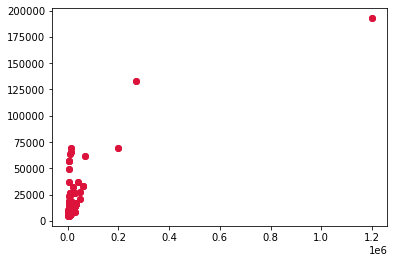

In [260]:
xgb_r =  xg.XGBRegressor(objective ='reg:squarederror',
                                 learning_rate =0.05, # smaller learning rate
                                 n_estimators = 3000, # larger number of trees
                                 max_depth = 5, 
                                 alpha = 0.01, # L1 regularization
                                 reg_lambda = 0.01, # L2 regularization
                                 subsample = 0.5, # fraction of samples used for each tree
                                 colsample_bytree = 0.2, # fraction of columns used for each tree
                                 early_stopping_rounds = 100, # early stopping after 50 rounds without improvement
                                 eval_metric = 'rmse', # evaluation metric
                                 verbose = True) # set to True to see training progress
                                    
                                
# xgb_r.fit(train_x, train_y)

xgb_r.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])
# Predict the model
pred_train = xgb_r.predict(X_train,ntree_limit=xgb_r .best_ntree_limit)
pred_test = xgb_r.predict(X_test,ntree_limit=xgb_r .best_ntree_limit)
# RMSE Computation
rmse_train = MSE(y_test, pred_test)
print(f"RMSE for train data is{rmse_train}")
rmse_test = MSE(y_train, pred_train)
print(f"RMSE for train data is{rmse_test}")
# RMSE Computation
plt.scatter(y_train.tolist(), pred_train.tolist(), c='crimson')
plt.scatter(y_train.flatten(), pred_train.flatten(), c='crimson')

###y0 test###

In [255]:
y_test.dtype

dtype('float32')

In [256]:
pred_test.dtype

dtype('float32')

In [257]:
from sklearn.metrics import f1_score, r2_score

In [261]:

rsquared = r2_score(y_train, pred_train)
print(f"R-squared value: {rsquared:.2f}")

R-squared value: 0.30


In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create a Linear Regression object
reg = LinearRegression()

# fit the model using the training data
reg.fit(X_train, y_train)

# predict the target variable for training and testing data
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# compute the mean squared error (MSE) and coefficient of determination (R^2) for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# print the MSE and R^2 values
print('Training MSE:', mse_train)
print('Testing MSE:', mse_test)
print('Training R^2:', r2_train)
print('Testing R^2:', r2_test)

Training MSE: 1393724571.7345634
Testing MSE: 1.0247402533875605e+26
Training R^2: 0.3071758098320254
Testing R^2: -5838917553638658.0
